INITIALISING THE ENVIROMENT FOR OUR PREPROCESSING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib3
import math

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"himanshyouyadav","key":"3486019dcdc4f8b3d247862fe172b8ee"}'}

In [ ]:
 ! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
mkdir CWC

In [ ]:
cd CWC

/content/CWC


In [ ]:
! kaggle datasets download -d saivamshi/cricket-world-cup-2019-players-data

  0% 0.00/395k [00:00<?, ?B/s]
100% 395k/395k [00:00<00:00, 54.4MB/s]


In [ ]:
! unzip cricket-world-cup-2019-players-data.zip

Archive:  cricket-world-cup-2019-players-data.zip
  inflating: Batsman_Data.csv        
  inflating: Bowler_data.csv         
  inflating: Ground_Averages.csv     
  inflating: ODI_Match_Results.csv   
  inflating: ODI_Match_Totals.csv    
  inflating: WC_players.csv          


In [ ]:
bat_data = pd.read_csv("Batsman_Data.csv") #Reading CSV file

In [ ]:
bat_data.head(8155)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8150,8151,17*,17,12,141.66,1,1,v Pakistan,Bristol,14 May 2019,ODI # 4135,Eoin Morgan,24598
8151,8152,DNB,-,-,-,-,-,v Pakistan,Leeds,19 May 2019,ODI # 4140,Eoin Morgan,24598
8152,8153,DNB,-,-,-,-,-,v West Indies,Dublin (Malahide),13 May 2019,ODI # 4134,Abu Jayed,410763
8153,8154,DNB,-,-,-,-,-,v Ireland,Dublin,15 May 2019,ODI # 4136,Abu Jayed,410763


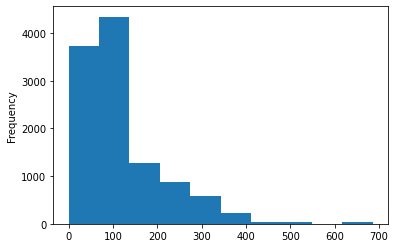

In [ ]:
bat_data["SR"].plot.hist(y="Frequency",x="Runs")

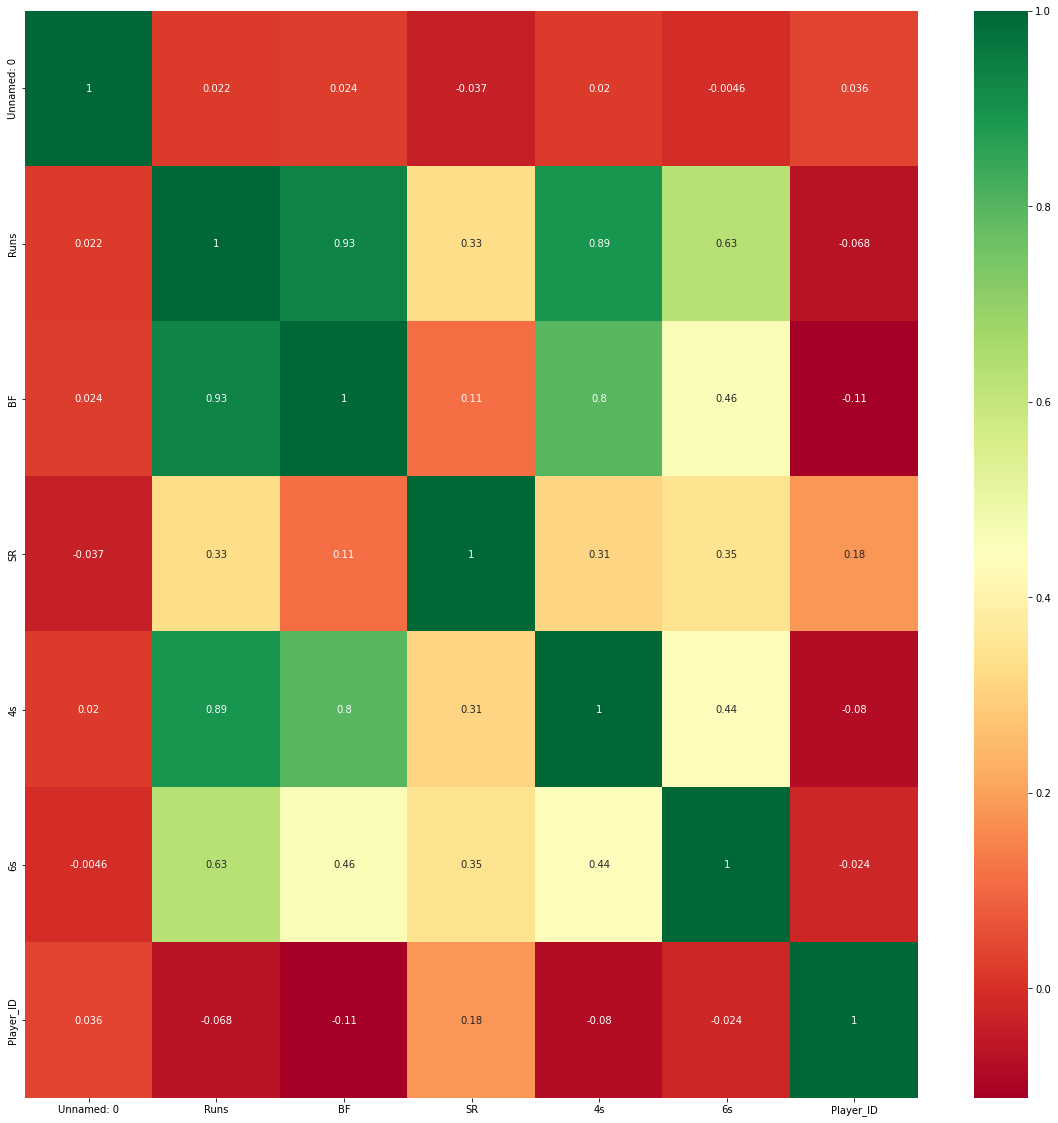

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

X = bat_data.iloc[:,0:13]
y = bat_data.iloc[:],

corrmat = bat_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(bat_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# **APPLY IMPUTATION TECHNIQUES**

---



1. MEAN

In [ ]:
bat_data = pd.read_csv("Batsman_Data.csv") #Reading CSV file
col  = ["Runs", "BF", "SR", "4s", "6s"]
bat_data[col] = bat_data[col].replace("-", "")
bat_data[col] = bat_data[col].apply(pd.to_numeric)

batsman = bat_data
player_id_list = bat_data["Player_ID"].unique()
player_id_list
for player in player_id_list:
    player_id = bat_data[bat_data['Player_ID'] == player]
    avgRun = float(player_id.Runs.mean())
    avgSR = player_id.SR.mean()
    values = {"Runs":avgRun,"SR":avgSR}
    bat_data[bat_data['Player_ID'] == player] = bat_data[bat_data['Player_ID'] == player].fillna(value = values)
print(bat_data)
dataset = bat_data[['Runs','SR']].apply(np.ceil)
dataset = dataset.dropna(subset=["Runs","SR"])
tmp_data = dataset
print(dataset)
dataset[["Runs","SR"]].isna().mean()

       Unnamed: 0  Bat1       Runs  ...    Match_ID         Batsman  Player_ID
0               1   DNB   4.659091  ...  ODI # 2933   Oshane Thomas      49619
1               2   DNB   4.659091  ...  ODI # 2935   Oshane Thomas      49619
2               3   DNB   4.659091  ...  ODI # 2936   Oshane Thomas      49619
3               4   DNB   4.659091  ...  ODI # 2937   Oshane Thomas      49619
4               5   DNB   4.659091  ...  ODI # 2938   Oshane Thomas      49619
...           ...   ...        ...  ...         ...             ...        ...
11144       11145    46  46.000000  ...  ODI # 4100  Gulbadin Naib      352048
11145       11146     3   3.000000  ...  ODI # 4101  Gulbadin Naib      352048
11146       11147     1   1.000000  ...  ODI # 4108  Gulbadin Naib      352048
11147       11148   DNB  18.340909  ...  ODI # 4131  Gulbadin Naib      352048
11148       11149  TDNB  18.340909  ...  ODI # 4139  Gulbadin Naib      352048

[11149 rows x 13 columns]
       Runs    SR
0      

Runs    0.0
SR      0.0
dtype: float64

In [ ]:
# print(dataset.to_string())
# dataset[["Runs","SR"]].isna().mean()
dataset[dataset.isnull().any(axis=1)]

,Runs,SR


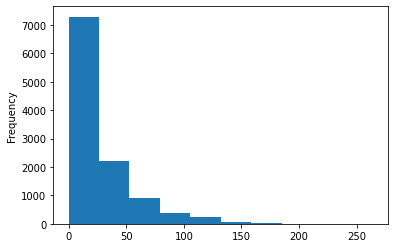

In [ ]:
dataset["Runs"].plot.hist(y="Frequency",x="Runs")

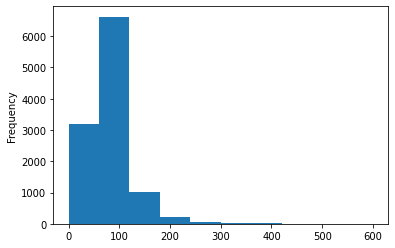

In [ ]:
dataset["SR"].plot.hist(y="Frequency",x="Strike Rate")

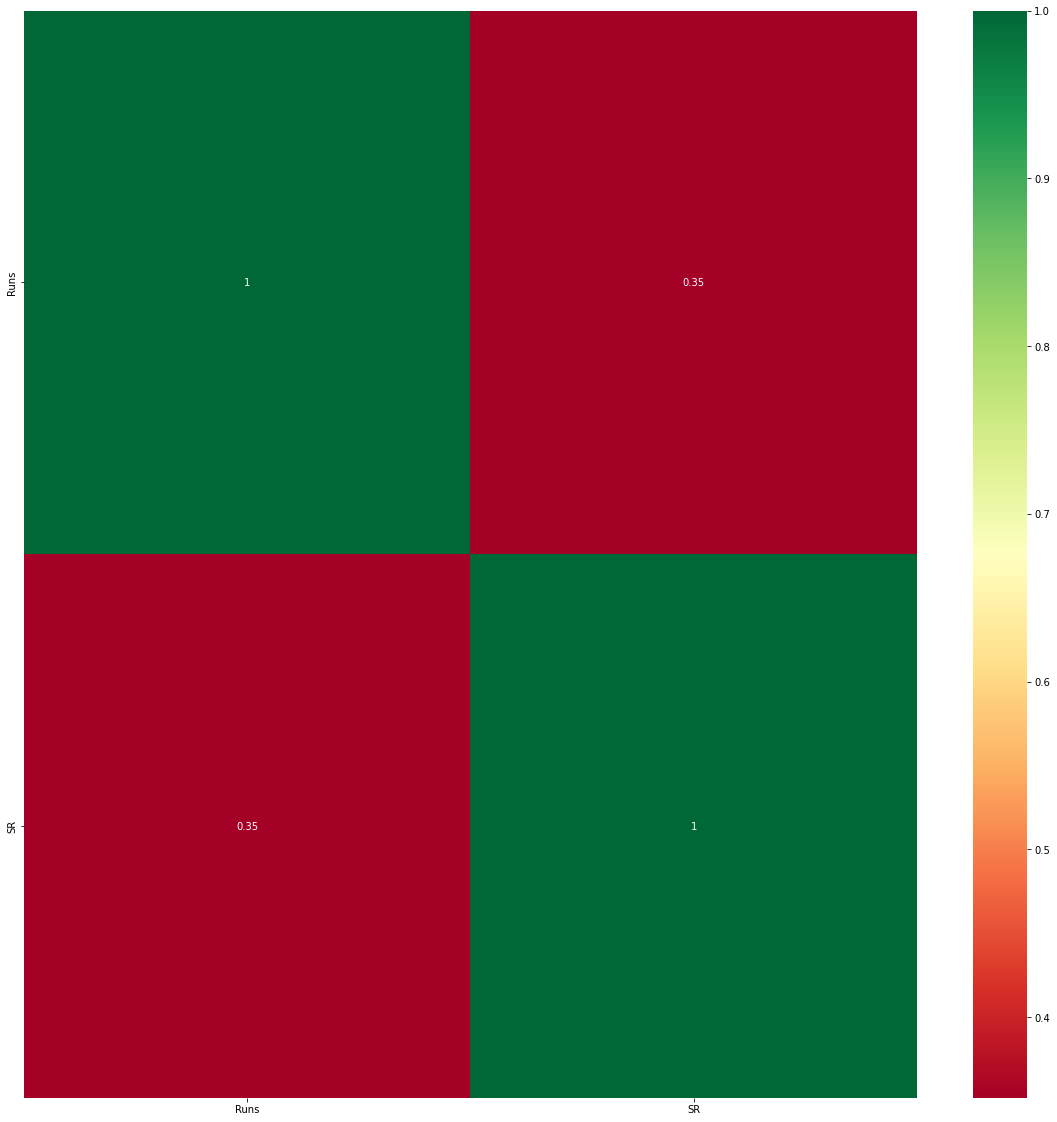

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

X = dataset.iloc[:,0:2]
y = dataset.iloc[:],

corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")


2.MEDIAN

In [ ]:
bat_data = pd.read_csv("Batsman_Data.csv") #Reading CSV file
col  = ["Runs", "BF", "SR", "4s", "6s"]
bat_data[col] = bat_data[col].replace("-", "")
bat_data[col] = bat_data[col].apply(pd.to_numeric)

batsman = bat_data
player_id_list = bat_data["Player_ID"].unique()
player_id_list
for player in player_id_list:
    player_id = bat_data[bat_data['Player_ID'] == player]
    medRun = player_id.Runs.median()
    medSR = player_id.SR.median()
    values = {"Runs":medRun,"SR":medSR}
    bat_data[bat_data['Player_ID'] == player] = bat_data[bat_data['Player_ID'] == player].fillna(value = values)
print(bat_data)
dataset = bat_data[X = dataset.iloc[:,0:2]
['Runs','SR']].apply(np.ceil)
dataset = dataset.dropna(subset=["Runs","SR"])
print(dataset)

       Unnamed: 0  Bat1  Runs  ...    Match_ID         Batsman  Player_ID
0               1   DNB   2.0  ...  ODI # 2933   Oshane Thomas      49619
1               2   DNB   2.0  ...  ODI # 2935   Oshane Thomas      49619
2               3   DNB   2.0  ...  ODI # 2936   Oshane Thomas      49619
3               4   DNB   2.0  ...  ODI # 2937   Oshane Thomas      49619
4               5   DNB   2.0  ...  ODI # 2938   Oshane Thomas      49619
...           ...   ...   ...  ...         ...             ...        ...
11144       11145    46  46.0  ...  ODI # 4100  Gulbadin Naib      352048
11145       11146     3   3.0  ...  ODI # 4101  Gulbadin Naib      352048
11146       11147     1   1.0  ...  ODI # 4108  Gulbadin Naib      352048
11147       11148   DNB  10.0  ...  ODI # 4131  Gulbadin Naib      352048
11148       11149  TDNB  10.0  ...  ODI # 4139  Gulbadin Naib      352048

[11149 rows x 13 columns]
       Runs    SR
0       2.0  43.0
1       2.0  43.0
2       2.0  43.0
3       2.0  

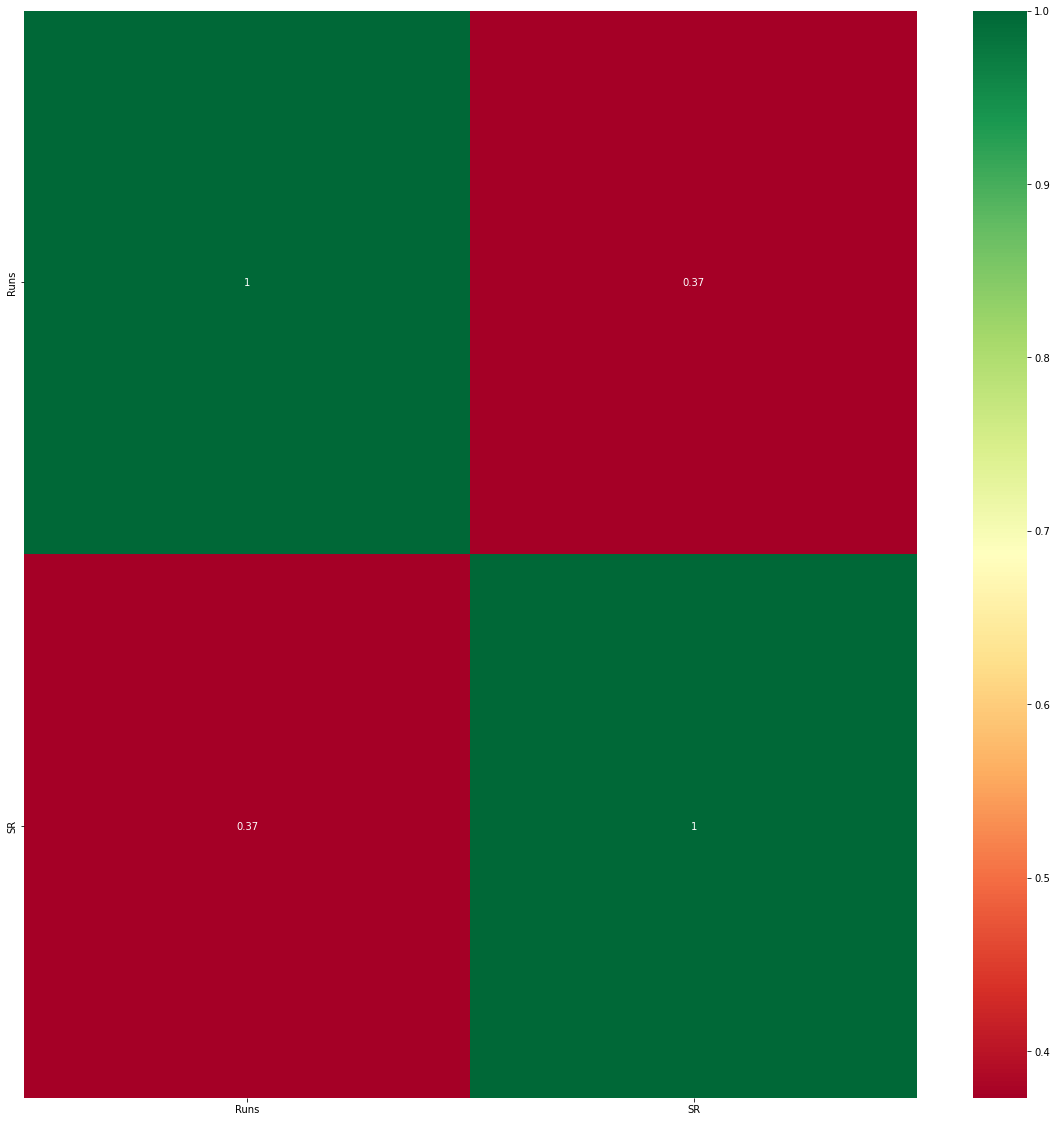

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

X = dataset.iloc[:,0:2]
y = dataset.iloc[:],

corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

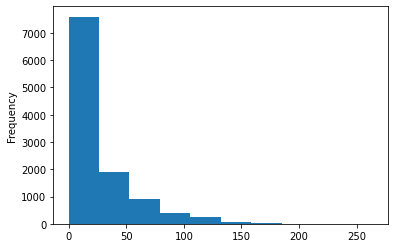

In [ ]:
dataset["Runs"].plot.hist(y="Frequency",x="Runs")

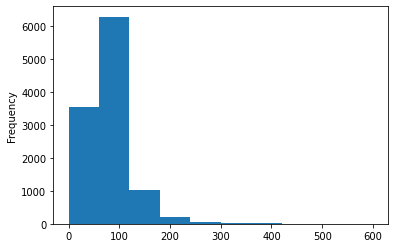

In [ ]:
dataset["SR"].plot.hist(y="Frequency",x="Strike Rate")

3. MODE

In [ ]:
bat_data = pd.read_csv("Batsman_Data.csv") #Reading CSV file
col  = ["Runs", "BF", "SR", "4s", "6s"]
bat_data[col] = bat_data[col].replace("-", "")
bat_data[col] = bat_data[col].apply(pd.to_numeric)

batsman = bat_data
player_id_list = bat_data["Player_ID"].unique()
player_id_list
for player in player_id_list:
    player_id = bat_data[bat_data['Player_ID'] == player]
    modeRun = player_id.Runs.mode()
    modeSR = player_id.SR.mode()
    values = {"Runs":modeRun,"SR":modeSR}
    bat_data[bat_data['Player_ID'] == player] = bat_data[bat_data['Player_ID'] == player].fillna(value = values)
print(bat_data)
dataset = bat_data[['Runs','SR']].apply(np.ceil)
dataset = dataset.dropna(subset=["Runs","SR"])
print(dataset)

       Unnamed: 0  Bat1  Runs  ...    Match_ID         Batsman  Player_ID
0               1   DNB   0.0  ...  ODI # 2933   Oshane Thomas      49619
1               2   DNB   NaN  ...  ODI # 2935   Oshane Thomas      49619
2               3   DNB   NaN  ...  ODI # 2936   Oshane Thomas      49619
3               4   DNB   NaN  ...  ODI # 2937   Oshane Thomas      49619
4               5   DNB   NaN  ...  ODI # 2938   Oshane Thomas      49619
...           ...   ...   ...  ...         ...             ...        ...
11144       11145    46  46.0  ...  ODI # 4100  Gulbadin Naib      352048
11145       11146     3   3.0  ...  ODI # 4101  Gulbadin Naib      352048
11146       11147     1   1.0  ...  ODI # 4108  Gulbadin Naib      352048
11147       11148   DNB   NaN  ...  ODI # 4131  Gulbadin Naib      352048
11148       11149  TDNB   NaN  ...  ODI # 4139  Gulbadin Naib      352048

[11149 rows x 13 columns]
       Runs    SR
0       0.0   0.0
5       0.0   0.0
9       1.0  34.0
10      0.0  

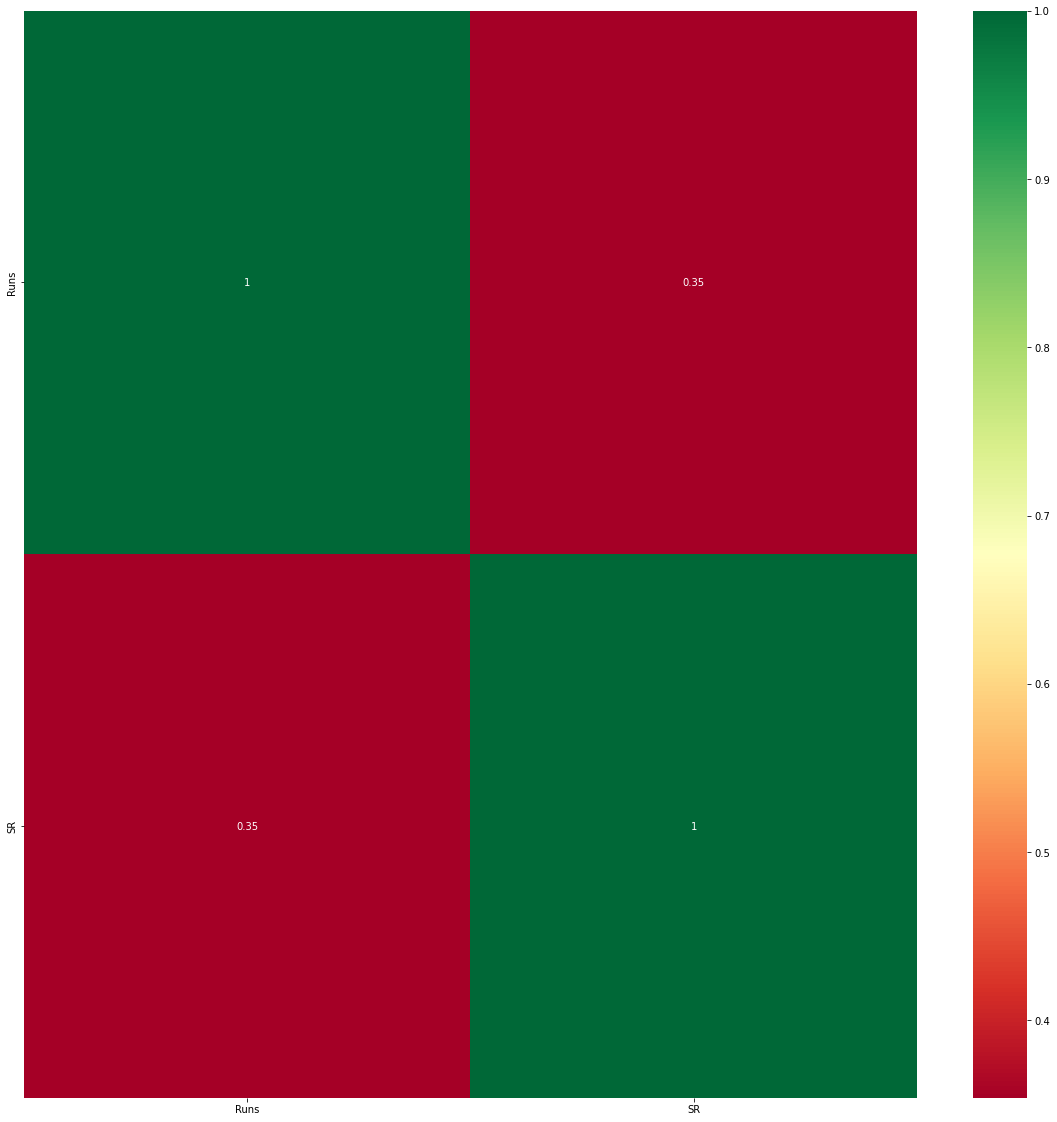

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

X = dataset.iloc[:,0:2]
y = dataset.iloc[:],

corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

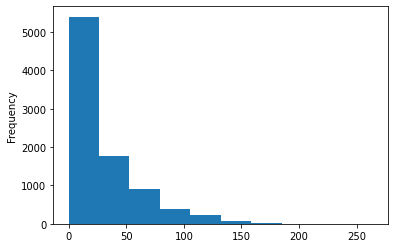

In [ ]:
dataset["Runs"].plot.hist(y="Frequency",x="Runs")

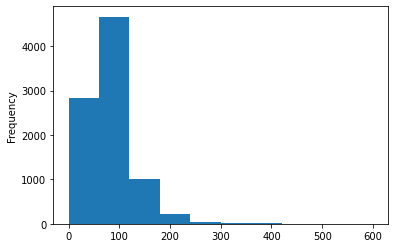

In [ ]:
dataset["SR"].plot.hist(y="Frequency",x="Strike Rate")

4. END OF DISTRIBUTION IMPUTATION

In [ ]:

bat_data = pd.read_csv("Batsman_Data.csv") #Reading CSV file
col  = ["Runs", "BF", "SR", "4s", "6s"]
bat_data[col] = bat_data[col].replace("-", "")
bat_data[col] = bat_data[col].apply(pd.to_numeric)

batsman = bat_data
player_id_list = bat_data["Player_ID"].unique()
player_id_list
for player in player_id_list:
    player_id = bat_data[bat_data['Player_ID'] == player]
    eodRuns = player_id.Runs.mean() + 3*player_id.Runs.std()
    eodSR = player_id.SR.mean() + 3*player_id.SR.std()
    values = {"Runs":eodRuns,"SR":eodSR}
    bat_data[bat_data['Player_ID'] == player] = bat_data[bat_data['Player_ID'] == player].fillna(value = values)
print(bat_data)
dataset = bat_data[['Runs','SR']].apply(np.ceil)
dataset = dataset.dropna(subset=["Runs","SR"])
print(dataset)

       Unnamed: 0  Bat1       Runs  ...    Match_ID         Batsman  Player_ID
0               1   DNB  24.368006  ...  ODI # 2933   Oshane Thomas      49619
1               2   DNB  24.368006  ...  ODI # 2935   Oshane Thomas      49619
2               3   DNB  24.368006  ...  ODI # 2936   Oshane Thomas      49619
3               4   DNB  24.368006  ...  ODI # 2937   Oshane Thomas      49619
4               5   DNB  24.368006  ...  ODI # 2938   Oshane Thomas      49619
...           ...   ...        ...  ...         ...             ...        ...
11144       11145    46  46.000000  ...  ODI # 4100  Gulbadin Naib      352048
11145       11146     3   3.000000  ...  ODI # 4101  Gulbadin Naib      352048
11146       11147     1   1.000000  ...  ODI # 4108  Gulbadin Naib      352048
11147       11148   DNB  82.042791  ...  ODI # 4131  Gulbadin Naib      352048
11148       11149  TDNB  82.042791  ...  ODI # 4139  Gulbadin Naib      352048

[11149 rows x 13 columns]
       Runs     SR
0     

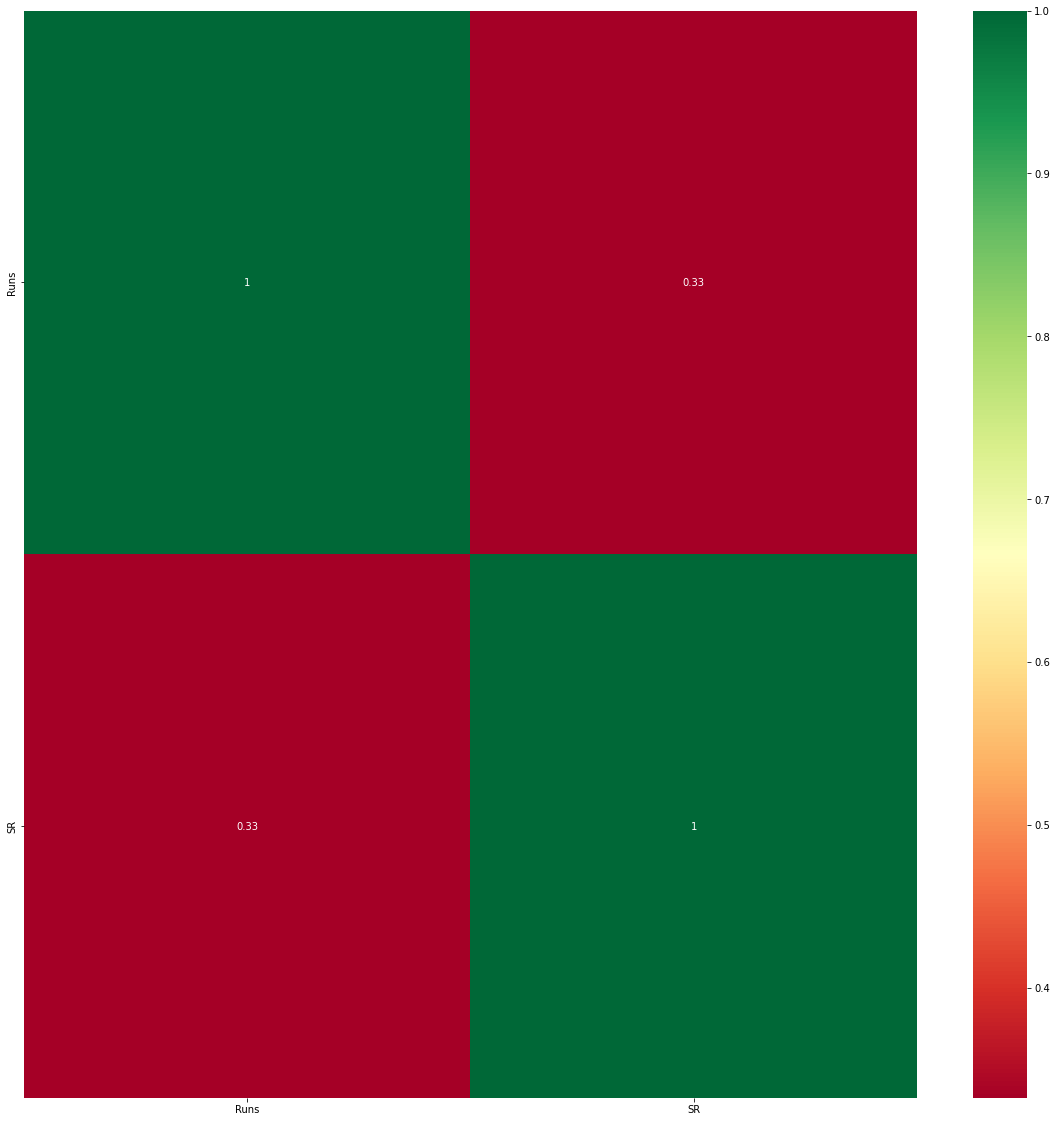

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

X = dataset.iloc[:,0:2]
y = dataset.iloc[:],

corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

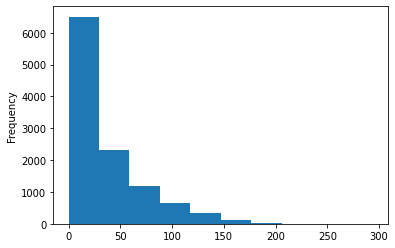

In [ ]:
dataset["Runs"].plot.hist(y="Frequency",x="Runs")

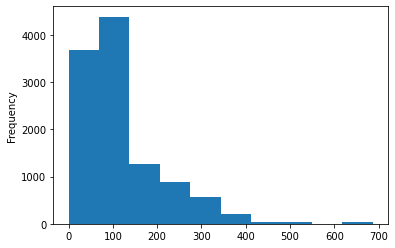

In [ ]:
dataset["SR"].plot.hist(y="Frequency",x="Strike Rate")

**ENCODING**


---



In [ ]:
dataset = bat_data[["Opposition","Batsman"]]

In [ ]:
dataset

,Opposition,Batsman
0,v India,Oshane Thomas
1,v India,Oshane Thomas
2,v India,Oshane Thomas
3,v Bangladesh,Oshane Thomas
4,v India,Oshane Thomas
...,...,...
11144,v Ireland,Gulbadin Naib
11145,v Ireland,Gulbadin Naib
11146,v Ireland,Gulbadin Naib
11147,v Scotland,Gulbadin Naib


1. One Hot Encoding

In [ ]:
dt = dataset
tmp = pd.get_dummies(dt['Opposition'])
tmp

,v Afghanistan,v Africa XI,v Asia XI,v Australia,v Bangladesh,v Bermuda,v Canada,v England,v Hong Kong,v India,v Ireland,v Kenya,v Netherlands,v New Zealand,v P.N.G.,v Pakistan,v Scotland,v South Africa,v Sri Lanka,v U.A.E.,v West Indies,v Zimbabwe
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11144,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
11145,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
11146,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
11147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
dt = bat_data[bat_data.Opposition == "v India"]
tmp = pd.get_dummies(dt['Batsman'])
# print(tmp.to_string())
# tmp
dt = dt.head(150)
tmp = pd.get_dummies(dt['Batsman'])
tmp

,Andre Russell,Ashley Nurse,Chris Gayle,Darren Bravo,Evin Lewis,Fabian Allen,Jason Holder,Kemar Roach,Nuwan Pradeep,Oshane Thomas,Shai Hope,Shimron Hetmyer
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0,0,0,0,0,0,1,0,0,0,0,0
947,0,0,0,0,0,0,1,0,0,0,0,0
948,0,0,0,0,0,0,1,0,0,0,0,0
959,0,0,0,0,0,0,0,0,1,0,0,0


2. Label Encoding

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt = dataset
le.fit(dt["Opposition"])
dt

,Opposition,Batsman
0,v India,Oshane Thomas
1,v India,Oshane Thomas
2,v India,Oshane Thomas
3,v Bangladesh,Oshane Thomas
4,v India,Oshane Thomas
...,...,...
11144,v Ireland,Gulbadin Naib
11145,v Ireland,Gulbadin Naib
11146,v Ireland,Gulbadin Naib
11147,v Scotland,Gulbadin Naib


In [ ]:
dt["le_Opp"] = le.transform(dt["Opposition"])
dt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Opposition,Batsman,le_Opp
0,v India,Oshane Thomas,9
1,v India,Oshane Thomas,9
2,v India,Oshane Thomas,9
3,v Bangladesh,Oshane Thomas,4
4,v India,Oshane Thomas,9
...,...,...,...
11144,v Ireland,Gulbadin Naib,10
11145,v Ireland,Gulbadin Naib,10
11146,v Ireland,Gulbadin Naib,10
11147,v Scotland,Gulbadin Naib,16


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt = dataset
le.fit(dt["Batsman"])
dt["le_Batsman"] = le.transform(dt["Batsman"])
dt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Opposition,Batsman,le_Opp,le_Batsman
0,v India,Oshane Thomas,9,113
1,v India,Oshane Thomas,9,113
2,v India,Oshane Thomas,9,113
3,v Bangladesh,Oshane Thomas,4,113
4,v India,Oshane Thomas,9,113
...,...,...,...,...
11144,v Ireland,Gulbadin Naib,10,42
11145,v Ireland,Gulbadin Naib,10,42
11146,v Ireland,Gulbadin Naib,10,42
11147,v Scotland,Gulbadin Naib,16,42


In [ ]:
dataset

,Opposition,Batsman,le_Opp,le_Batsman
0,v India,Oshane Thomas,9,113
1,v India,Oshane Thomas,9,113
2,v India,Oshane Thomas,9,113
3,v Bangladesh,Oshane Thomas,4,113
4,v India,Oshane Thomas,9,113
...,...,...,...,...
11144,v Ireland,Gulbadin Naib,10,42
11145,v Ireland,Gulbadin Naib,10,42
11146,v Ireland,Gulbadin Naib,10,42
11147,v Scotland,Gulbadin Naib,16,42


3. Frequency Encoding

In [ ]:
dataset = bat_data[["Opposition","Batsman"]]

In [ ]:
dataset

,Opposition,Batsman
0,v India,Oshane Thomas
1,v India,Oshane Thomas
2,v India,Oshane Thomas
3,v Bangladesh,Oshane Thomas
4,v India,Oshane Thomas
...,...,...
11144,v Ireland,Gulbadin Naib
11145,v Ireland,Gulbadin Naib
11146,v Ireland,Gulbadin Naib
11147,v Scotland,Gulbadin Naib


In [ ]:
dt = dataset
values_count = dt["Opposition"].value_counts().to_dict()
values_count
dt["opp_freq"] = dt["Opposition"].map(values_count)
dt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Opposition,Batsman,opp_freq
0,v India,Oshane Thomas,1187
1,v India,Oshane Thomas,1187
2,v India,Oshane Thomas,1187
3,v Bangladesh,Oshane Thomas,639
4,v India,Oshane Thomas,1187
...,...,...,...
11144,v Ireland,Gulbadin Naib,450
11145,v Ireland,Gulbadin Naib,450
11146,v Ireland,Gulbadin Naib,450
11147,v Scotland,Gulbadin Naib,169


In [ ]:

dt = dataset
values_count = dt["Batsman"].value_counts().to_dict()
values_count
dt["Batsman_freq"] = dt["Batsman"].map(values_count)
dt

# values_count

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Opposition,Batsman,opp_freq,Batsman_freq
0,v India,Oshane Thomas,1187,90
1,v India,Oshane Thomas,1187,90
2,v India,Oshane Thomas,1187,90
3,v Bangladesh,Oshane Thomas,639,90
4,v India,Oshane Thomas,1187,90
...,...,...,...,...
11144,v Ireland,Gulbadin Naib,450,54
11145,v Ireland,Gulbadin Naib,450,54
11146,v Ireland,Gulbadin Naib,450,54
11147,v Scotland,Gulbadin Naib,169,54


4. Mean Encoding

In [ ]:
dt = pd.concat([dt,tmp_data],axis=1)
df = dt[["Runs","Batsman","Opposition","SR"]]
df

,Runs,Batsman,Opposition,SR
0,5.0,Oshane Thomas,v India,46.0
1,5.0,Oshane Thomas,v India,46.0
2,5.0,Oshane Thomas,v India,46.0
3,5.0,Oshane Thomas,v Bangladesh,46.0
4,5.0,Oshane Thomas,v India,46.0
...,...,...,...,...
11144,46.0,Gulbadin Naib,v Ireland,76.0
11145,3.0,Gulbadin Naib,v Ireland,50.0
11146,1.0,Gulbadin Naib,v Ireland,13.0
11147,19.0,Gulbadin Naib,v Scotland,62.0


In [ ]:
#For Batsman Runs
# df.groupby(["Batsman"])["Runs"].mean().apply(np.ceil())
mean_labels = df.groupby(["Batsman"])["Runs"]. mean().to_dict()
df['Runs_mean'] = df['Batsman'].map(mean_labels)
df['Runs_mean'] = df['Runs_mean'].apply(np.ceil)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Runs,Batsman,Opposition,SR,Runs_mean
0,5.0,Oshane Thomas,v India,46.0,5.0
1,5.0,Oshane Thomas,v India,46.0,5.0
2,5.0,Oshane Thomas,v India,46.0,5.0
3,5.0,Oshane Thomas,v Bangladesh,46.0,5.0
4,5.0,Oshane Thomas,v India,46.0,5.0
...,...,...,...,...,...
11144,46.0,Gulbadin Naib,v Ireland,76.0,19.0
11145,3.0,Gulbadin Naib,v Ireland,50.0,19.0
11146,1.0,Gulbadin Naib,v Ireland,13.0,19.0
11147,19.0,Gulbadin Naib,v Scotland,62.0,19.0


In [ ]:

#For Batsman SR
mean_labels = df.groupby(["Batsman"])["SR"]. mean().to_dict()
df['SR_mean'] = df['Batsman'].map(mean_labels)
df['SR_mean'] = df['SR_mean'].apply(np.ceil)
df

,Runs,Batsman,Opposition,SR,Runs_mean,SR_mean
0,5.0,Oshane Thomas,v India,46.0,5.0,42.0
1,5.0,Oshane Thomas,v India,46.0,5.0,42.0
2,5.0,Oshane Thomas,v India,46.0,5.0,42.0
3,5.0,Oshane Thomas,v Bangladesh,46.0,5.0,42.0
4,5.0,Oshane Thomas,v India,46.0,5.0,42.0
...,...,...,...,...,...,...
11144,46.0,Gulbadin Naib,v Ireland,76.0,19.0,62.0
11145,3.0,Gulbadin Naib,v Ireland,50.0,19.0,62.0
11146,1.0,Gulbadin Naib,v Ireland,13.0,19.0,62.0
11147,19.0,Gulbadin Naib,v Scotland,62.0,19.0,62.0


5. Ordinal Encoding

In [ ]:
df = dt[["Runs","Batsman","Opposition","SR"]]
df

,Runs,Batsman,Opposition,SR
0,5.0,Oshane Thomas,v India,46.0
1,5.0,Oshane Thomas,v India,46.0
2,5.0,Oshane Thomas,v India,46.0
3,5.0,Oshane Thomas,v Bangladesh,46.0
4,5.0,Oshane Thomas,v India,46.0
...,...,...,...,...
11144,46.0,Gulbadin Naib,v Ireland,76.0
11145,3.0,Gulbadin Naib,v Ireland,50.0
11146,1.0,Gulbadin Naib,v Ireland,13.0
11147,19.0,Gulbadin Naib,v Scotland,62.0


In [ ]:
ordered_cats = df.groupby(['Batsman'])["Runs"].mean().sort_values().index

In [ ]:
ordered_cats

Index(['Nicholas Pooran ', 'Tabraiz Shamsi', 'Mohammad Hasnain',
       'Shannon Gabriel', 'Nuwan Pradeep', 'Jasprit Bumrah', 'Junaid Khan',
       'Rubel Hossain', 'Mustafizur Rahman', 'Mujeeb Ur Rahman',
       ...
       'Quinton de Kock ', 'Babar Azam ', 'Rassie van der Dussen', 'Shai Hope',
       'Hashim Amla', 'Fakhar Zaman', 'Virat Kohli ', 'Imam-ul-Haq',
       'Abid Ali', 'Abu Jayed'],
      dtype='object', name='Batsman', length=149)

In [ ]:
cat_map= {k: i for i, k in enumerate(ordered_cats, 0)} # Dictionary creation:

In [ ]:
df['Batsman_ordered'] = df['Batsman'].map(cat_map)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,Runs,Batsman,Opposition,SR,Batsman_ordered
0,5.0,Oshane Thomas,v India,46.0,13
1,5.0,Oshane Thomas,v India,46.0,13
2,5.0,Oshane Thomas,v India,46.0,13
3,5.0,Oshane Thomas,v Bangladesh,46.0,13
4,5.0,Oshane Thomas,v India,46.0,13
...,...,...,...,...,...
11144,46.0,Gulbadin Naib,v Ireland,76.0,60
11145,3.0,Gulbadin Naib,v Ireland,50.0,60
11146,1.0,Gulbadin Naib,v Ireland,13.0,60
11147,19.0,Gulbadin Naib,v Scotland,62.0,60


In [ ]:
df.tail(10)

,Runs,Batsman,Opposition,SR,Batsman_ordered
11139,4.0,Gulbadin Naib,v Sri Lanka,80.0,60
11140,42.0,Gulbadin Naib,v Bangladesh,111.0,60
11141,10.0,Gulbadin Naib,v Pakistan,143.0,60
11142,0.0,Gulbadin Naib,v Bangladesh,0.0,60
11143,15.0,Gulbadin Naib,v India,33.0,60
11144,46.0,Gulbadin Naib,v Ireland,76.0,60
11145,3.0,Gulbadin Naib,v Ireland,50.0,60
11146,1.0,Gulbadin Naib,v Ireland,13.0,60
11147,19.0,Gulbadin Naib,v Scotland,62.0,60
11148,19.0,Gulbadin Naib,v Ireland,62.0,60


In [ ]:
df = df.sort_values(by=["Batsman_ordered"])

In [ ]:
print(df.tail(150).to_string())

       Runs       Batsman      Opposition     SR  Batsman_ordered
6694  102.0  Virat Kohli     v Bangladesh  108.0              145
6693   71.0  Virat Kohli      v Sri Lanka  105.0              145
6692   91.0  Virat Kohli     v Bangladesh   90.0              145
6691    9.0  Virat Kohli      v Sri Lanka   75.0              145
6690   50.0  Virat Kohli      v Sri Lanka   80.0              145
6689  107.0  Virat Kohli      v Sri Lanka   94.0              145
6688   54.0  Virat Kohli      v Sri Lanka   84.0              145
6687   27.0  Virat Kohli      v Sri Lanka  143.0              145
6686   10.0  Virat Kohli      v Australia   63.0              145
6685   30.0  Virat Kohli      v Australia   74.0              145
6684   79.0  Virat Kohli    v West Indies   76.0              145
6683   50.0  Virat Kohli      v Australia   80.0              145
6682   16.0  Virat Kohli       v Pakistan   67.0              145
6681    2.0  Virat Kohli      v Sri Lanka  100.0              145
6680   31.